#  STEP1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# STEP2 Importing data

In [2]:
path=r"C:\Users\chenh\z_Careerfoundry\Achievements 6"
df=pd.read_csv(os.path.join(path,'kc_house_clean.csv'))

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')

## remove any categorical columns

In [4]:
# Transfer  'yr_built' to 'house_age'
current_year = 2015
df['house_age'] = current_year - df['yr_built']

In [5]:
# Transfer  'yr_renovated' to 'years_since_renovation'
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['last_renovated'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] > 0 else row['yr_built'], axis=1)
df['years_since_renovation'] = current_year - df['last_renovated']

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'house_age', 'renovated', 'last_renovated',
       'years_since_renovation'],
      dtype='object')

In [7]:
df_num=df.drop(columns=['Unnamed: 0', 'id', 'date','floors','waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated','zipcode', 'lat', 'long','renovated', 'last_renovated'])

In [8]:
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,house_age,years_since_renovation
0,221900.0,3,1.00,1180,5650,1180,0,60,60
1,538000.0,3,2.25,2570,7242,2170,400,64,24
2,180000.0,2,1.00,770,10000,770,0,82,82
3,604000.0,4,3.00,1960,5000,1050,910,50,50
4,510000.0,3,2.00,1680,8080,1680,0,28,28


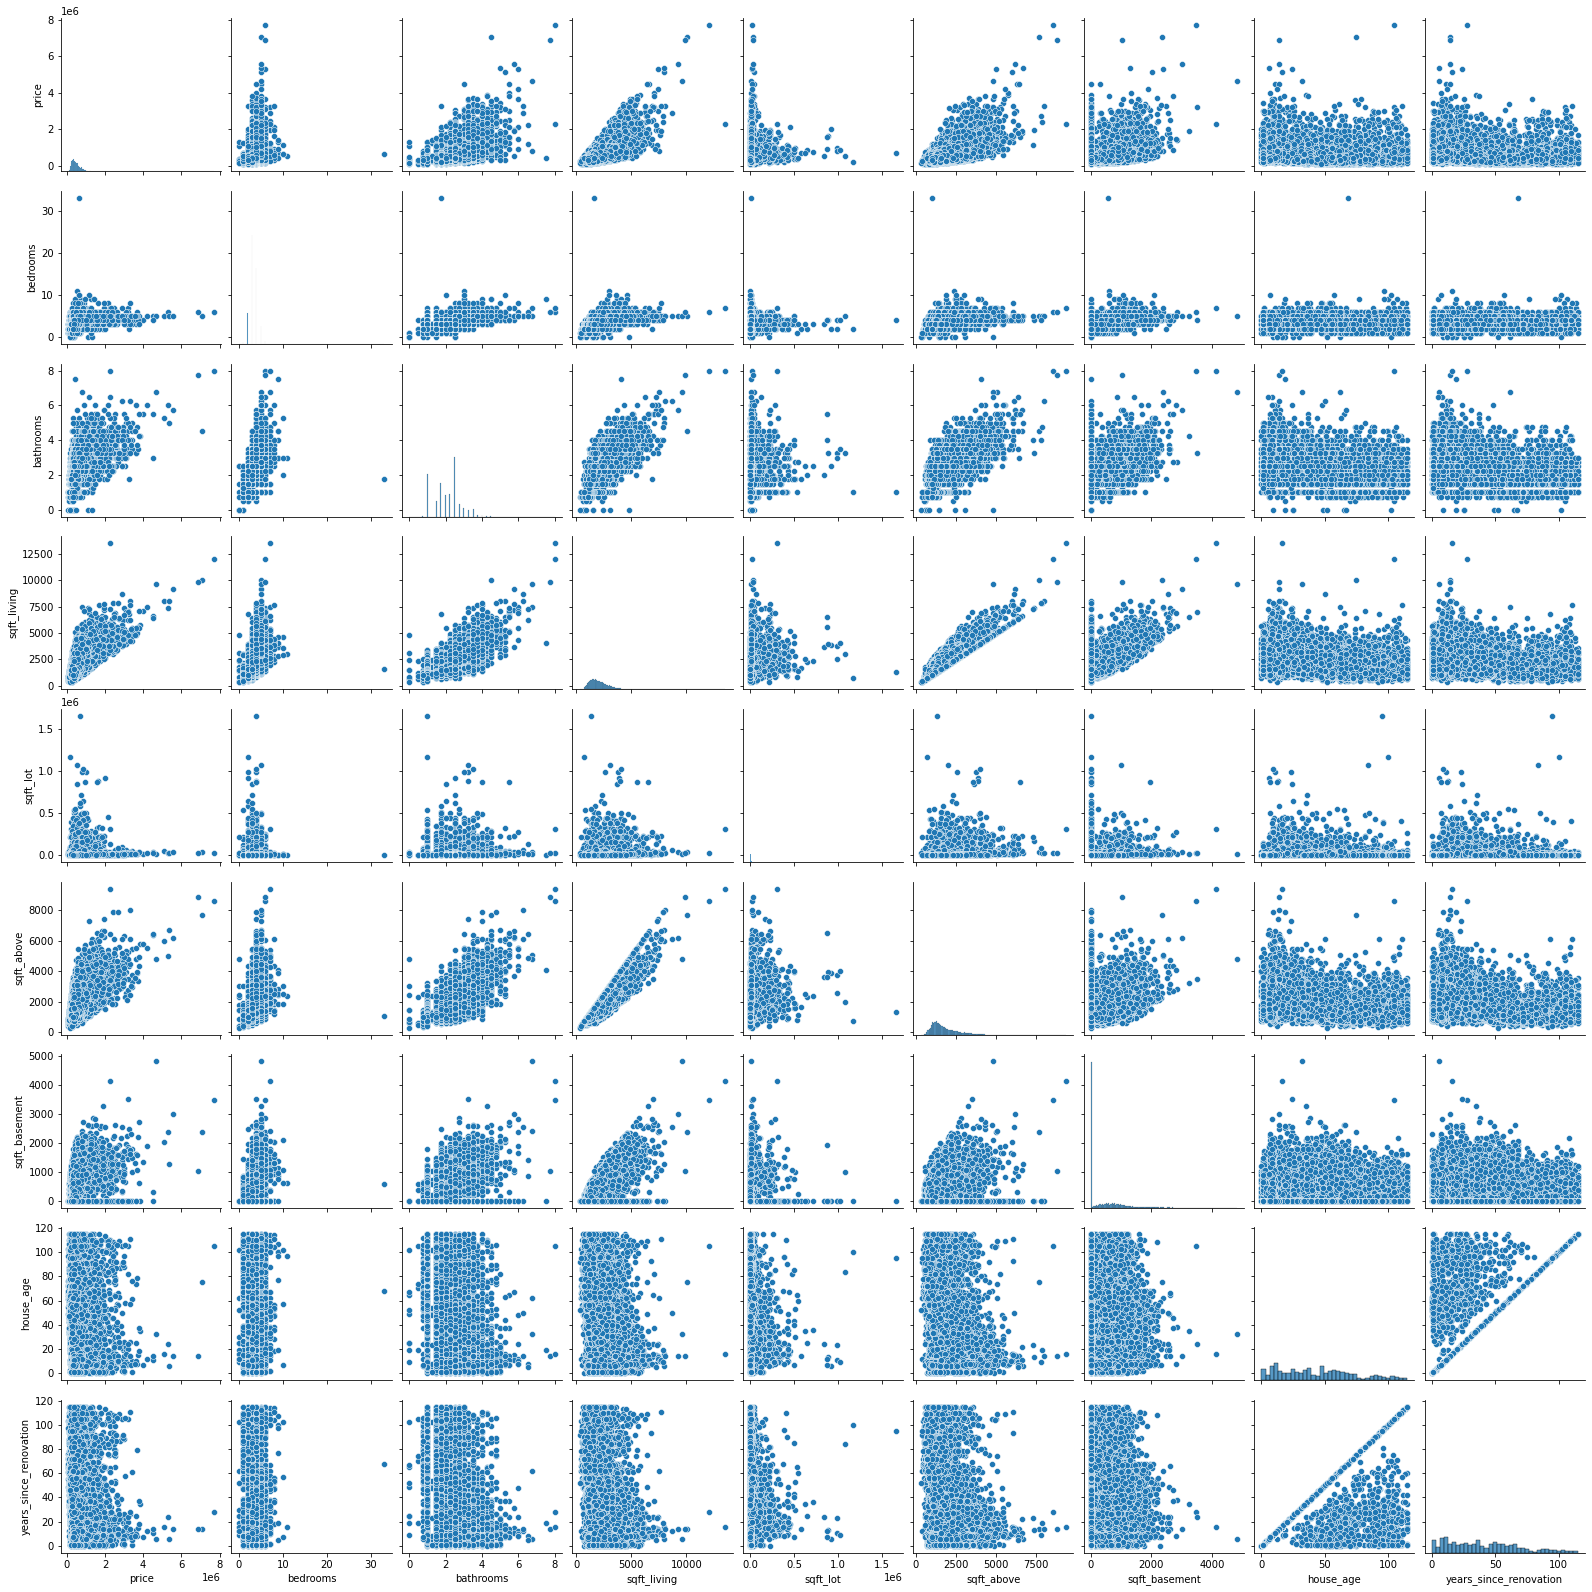

In [19]:
sns.pairplot(df_num)

##  standardize your data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_df_num = scaler.fit_transform(df_num)

scaled_df_num = pd.DataFrame(scaled_df_num, columns=df_num.columns)

In [18]:
scaled_df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,house_age,years_since_renovation
0,-0.866419,-0.398737,-1.447464,-0.979835,-0.228321,-0.734708,-0.658681,0.544898,0.638266
1,-0.005940,-0.398737,0.175607,0.533634,-0.189885,0.460841,0.245141,0.681079,-0.611465
2,-0.980478,-1.473959,-1.447464,-1.426254,-0.123298,-1.229834,-0.658681,1.293892,1.401991
3,0.173723,0.676485,1.149449,-0.130550,-0.244014,-0.891699,1.397515,0.204446,0.291119
4,-0.082161,-0.398737,-0.149007,-0.435422,-0.169653,-0.130895,-0.658681,-0.544548,-0.472606


# STEP3 elbow technique

In [21]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [22]:
score = [kmeans[i].fit(scaled_df_num).score(scaled_df_num) for i in range(len(kmeans))] 

score

AttributeError: 'NoneType' object has no attribute 'split'

This error is usually caused by the input data somewhere or the returned object is None. To locate and fix this problem, we can add more debugging information

In [20]:
try:
    km = KMeans(n_clusters=1)
    km.fit(df_num)
    score = km.score(df_num)
    print(f"Score for 3 clusters: {score}")
except Exception as e:
    print(f"An error occurred during single KMeans fitting: {e}")

An error occurred during single KMeans fitting: 'NoneType' object has no attribute 'split'


The value of n_clusters=1 is problematic, and we choose to skip this value 

In [23]:
num_cl = range(2, 11) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [24]:
score = [kmeans[i].fit(scaled_df_num).score(scaled_df_num) for i in range(len(kmeans))] 

score

[-141393.17756230067,
 -118183.41929153734,
 -102710.03821366951,
 -91014.73224285057,
 -81155.90844908237,
 -75943.29384473496,
 -71258.29188307413,
 -67412.26370355664,
 -63610.08204873788]

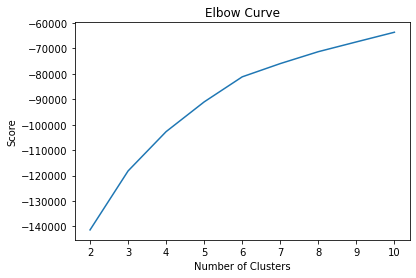

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Since the Elbow Curve does not have a significant elbow and the score is much less than 0. We need to improve the model to keep only the variables that have a strong correlation with price

In [27]:
correlation_matrix = scaled_df_num.corr()
selected_features = correlation_matrix.index[abs(correlation_matrix['price']) > 0.5].tolist()


In [28]:
df_select=scaled_df_num[selected_features]
df_select.head()

,price,bathrooms,sqft_living,sqft_above
0,-0.866419,-1.447464,-0.979835,-0.734708
1,-0.005940,0.175607,0.533634,0.460841
2,-0.980478,-1.447464,-1.426254,-1.229834
3,0.173723,1.149449,-0.130550,-0.891699
4,-0.082161,-0.149007,-0.435422,-0.130895


In [29]:
score = [kmeans[i].fit(df_select).score(df_select) for i in range(len(kmeans))] 

score

[-46677.45080214065,
 -33593.395593372996,
 -26706.162217423425,
 -23165.364435113876,
 -21068.448767374357,
 -19267.48579973907,
 -17743.07799621995,
 -16538.770841173766,
 -15492.645255456182]

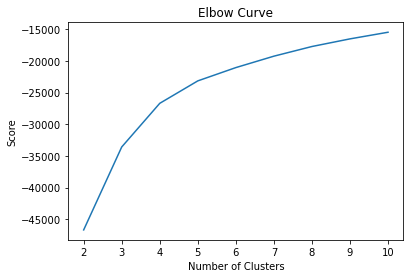

In [30]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The effect is better.

I will take the calculation of the new feature 'price_per_sqft' and use the new feature for K-Means clustering.  

In [31]:
df_num['price_per_sqft']=df_num['price'] / df_num['sqft_living']

In [32]:
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,house_age,years_since_renovation,price_per_sqft
0,221900.0,3,1.00,1180,5650,1180,0,60,60,188.050847
1,538000.0,3,2.25,2570,7242,2170,400,64,24,209.338521
2,180000.0,2,1.00,770,10000,770,0,82,82,233.766234
3,604000.0,4,3.00,1960,5000,1050,910,50,50,308.163265
4,510000.0,3,2.00,1680,8080,1680,0,28,28,303.571429


In [61]:
scaled_df = scaler.fit_transform(df_num)

scaled_df = pd.DataFrame(scaled_df, columns=df_num.columns)

In [62]:
scaled_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,house_age,years_since_renovation,price_per_sqft
0,-0.866419,-0.398737,-1.447464,-0.979835,-0.228321,-0.734708,-0.658681,0.544898,0.638266,-0.691502
1,-0.005940,-0.398737,0.175607,0.533634,-0.189885,0.460841,0.245141,0.681079,-0.611465,-0.498149
2,-0.980478,-1.473959,-1.447464,-1.426254,-0.123298,-1.229834,-0.658681,1.293892,1.401991,-0.276277
3,0.173723,0.676485,1.149449,-0.130550,-0.244014,-0.891699,1.397515,0.204446,0.291119,0.399458
4,-0.082161,-0.398737,-0.149007,-0.435422,-0.169653,-0.130895,-0.658681,-0.544548,-0.472606,0.357751


In [63]:
scaled_df=scaled_df[['price_per_sqft','bathrooms','bedrooms','house_age','years_since_renovation']]

In [64]:
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))] 

score

[-69102.36895065356,
 -58561.909429863845,
 -50849.12105780187,
 -45634.0168838717,
 -41930.87702628039,
 -38578.24410089698,
 -36245.369964644015,
 -34020.30541975911,
 -32265.562594151375]

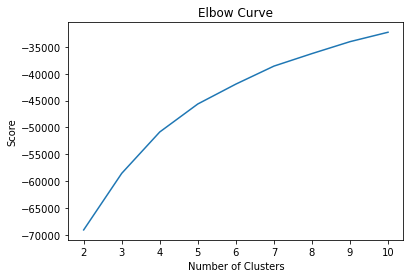

In [65]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The effect is still not good.

# STEP4 Make an informed decision.

Using selected variables will significantly optimize the Elbow Curve score, and after cluster=4, the rate of score increase slows down noticeably with the addition of more clusters.Based on that, I will choose the variables price, bathrooms, sqft_living, and sqft_above, and perform k-means modeling with Clusters=4.

 # STEP5 Run the k-means algorithm.

In [66]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [67]:
# Fit the k-means object to the data.

kmeans.fit(df_select)

KMeans(n_clusters=4)

# STEP6 Attach a new column to your dataframe with the resulting clusters 

In [68]:
df_select['clusters'] = kmeans.fit_predict(df_select)

C:\Users\chenh\AppData\Local\Temp/ipykernel_13620/2104275622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['clusters'] = kmeans.fit_predict(df_select)


In [69]:
df_select.head()

,price,bathrooms,sqft_living,sqft_above,clusters
0,-0.866419,-1.447464,-0.979835,-0.734708,1
1,-0.005940,0.175607,0.533634,0.460841,0
2,-0.980478,-1.447464,-1.426254,-1.229834,1
3,0.173723,1.149449,-0.130550,-0.891699,0
4,-0.082161,-0.149007,-0.435422,-0.130895,0


In [70]:
df_select['clusters'].value_counts()

0    9140
1    7175
3    4544
2     754
Name: clusters, dtype: int64

## Integrate the cluster column into the original dataset.

In [73]:
df_num['clusters'] = df_select['clusters']


In [74]:
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,house_age,years_since_renovation,price_per_sqft,clusters
0,221900.0,3,1.00,1180,5650,1180,0,60,60,188.050847,1
1,538000.0,3,2.25,2570,7242,2170,400,64,24,209.338521,0
2,180000.0,2,1.00,770,10000,770,0,82,82,233.766234,1
3,604000.0,4,3.00,1960,5000,1050,910,50,50,308.163265,0
4,510000.0,3,2.00,1680,8080,1680,0,28,28,303.571429,0


In [75]:
df_num['clusters'].value_counts()

0    9140
1    7175
3    4544
2     754
Name: clusters, dtype: int64

# STEP7 Create a few different visualizations (e.g., scatterplots) using your clustered data

In [83]:
palette = sns.color_palette("bright", 4)

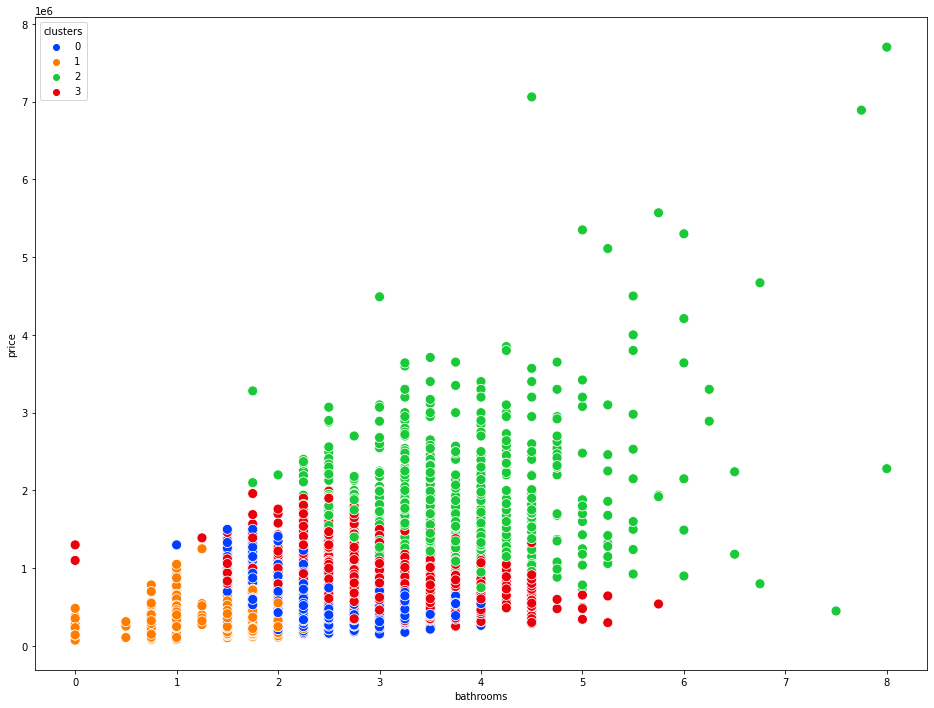

In [84]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x=df_num['bathrooms'], y=df_num['price'], hue=df_num['clusters'],palette=palette, s=100) 

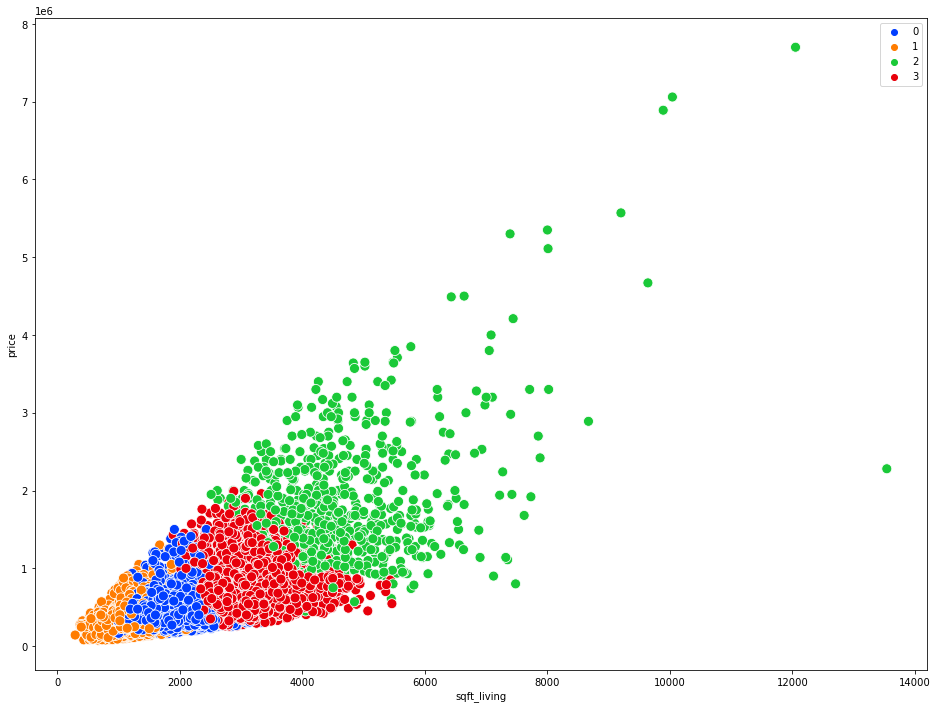

In [86]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x=df_num['sqft_living'], y=df_num['price'], hue=kmeans.labels_,palette=palette, s=100) 

# STEP8 Discuss how and why the clusters make sense

Analyze the scatter plot of bathrooms versus price. The green points represent the c=2 cluster, which exclusively occupies the region where bathrooms > 6 and prices > 3,000,000. Conversely, the orange points represent the c=1 cluster, with the vast majority of points concentrated in the region where bathrooms < 2 and prices < 1,000,000. The blue and red points represent the c=0 and c=3 clusters, respectively, with most of the points concentrated in the region where bathrooms are between 2 and 5 and prices are below 2,000,000.M

The situation with the scatter plot of sqft versus price is similar to the previous example. The c=2 cluster has high prices and large areas, the c=1 cluster has low prices and small areas, and the c=0 and c=3 clusters are concentrated between the other two clusters.

# STEP9 Calculate the descriptive statistics

In [90]:
df_num.groupby('clusters').agg({'price':['mean', 'median'], 
                         'bathrooms':['mean', 'median'], 
                         'sqft_living':['mean', 'median'],
                          'house_age':['mean', 'median']})

price            bathrooms         sqft_living          \
                  mean     median      mean median         mean  median   
clusters                                                                  
0         4.737791e+05   449000.0  2.290591   2.25  1999.400547  1990.0   
1         3.519032e+05   327000.0  1.312265   1.00  1285.905226  1270.0   
2         1.798292e+06  1645000.0  3.726459   3.50  4632.899204  4390.0   
3         7.622796e+05   732750.0  2.760783   2.50  3071.913732  3000.0   

          house_age         
               mean median  
clusters                    
0         39.098578   36.0  
1         61.523206   61.0  
2         29.533156   17.0  
3         28.565801   21.0

Analyze the statistics of the clusters:  
The c=2 group has the highest median house price, the highest median number of bathrooms, the largest median house size, and the youngest median house age.  
The c=1 group is completely opposite, with the lowest median house price, the fewest median number of bathrooms, the smallest median house size, and the oldest median house age.  
The values for the c=0 and c=3 groups fall between the values of the above two groups.

# STEP10 Propose what these results could be useful for in future steps of an analytics pipeline.

We used unsupervised machine learning to reclassify the data, and each new classification has distinct characteristics. This provides us with a new perspective for analysis. Subsequently, we can build regression models based on the new classifications to explain and predict housing prices.